## Problem Statement:-

#### Question-1)

Imagine you have a dataset where you have different Instagram features like username , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted.

In [55]:
## Import the necessary libraries:-

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [6]:
df = pd.read_csv(r"C:\Users\Prateek\Downloads\archive (6)\instagram_reach.csv")
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [8]:
df.shape

(100, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [10]:
# checking the nul value in dataset
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [13]:
# Check the column name in dataset
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [14]:
df.head(2)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23


In [15]:
# Remove unnacessary columns
df = df.drop(['Unnamed: 0','S.No'],axis=1)

In [17]:
# Checking all the columns name present in dataset
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [18]:
df.head(3)

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25


## Doing EDA and Analyze the Instagram Reach

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_9420\2611780806.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Followers'])


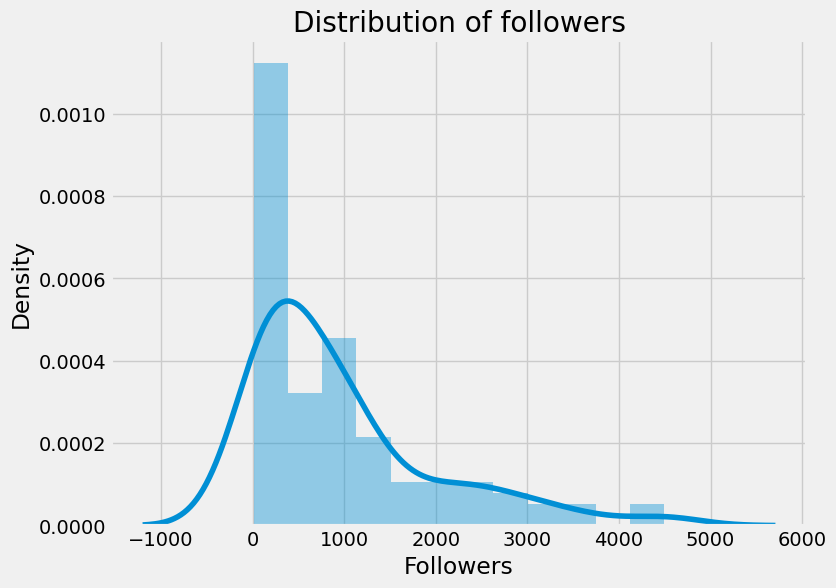

In [23]:
# Distribution of followers

plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
plt.title('Distribution of followers')
sns.distplot(df['Followers'])
plt.show()

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_9420\507487860.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Likes'])


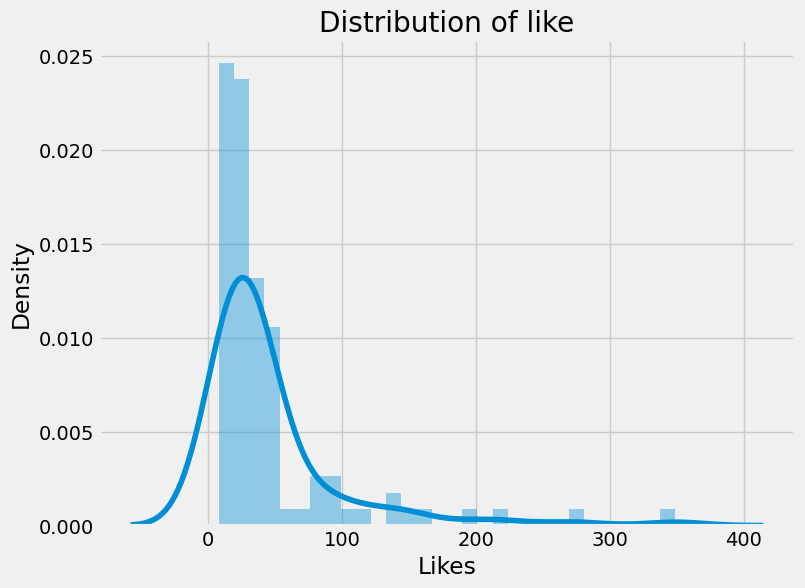

In [22]:
# Distribution of like

plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
plt.title('Distribution of like')
sns.distplot(df['Likes'])
plt.show()

In [40]:
# Relationship between followers and likes 

followers = df["Followers"].sum()
likes = df["Likes"].sum()

labels = ['Followers', 'Likes']
values = [followers , likes]

fig = px.pie(df,values=values,labels=labels,
            title= 'Instagram post for various source',hole=0.5)
fig.show()

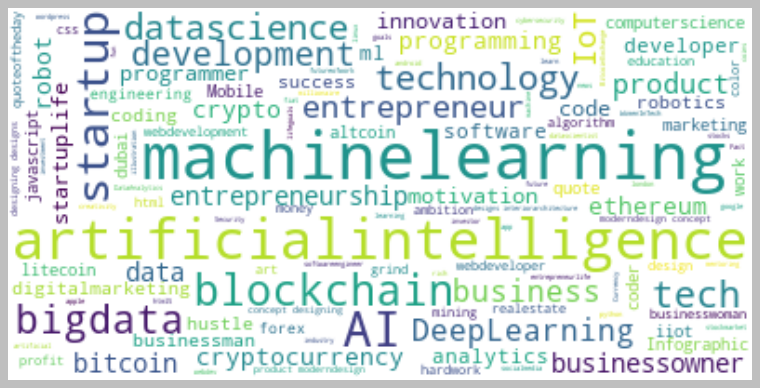

In [57]:
## Plotting Word-Cloud for Hashtag Related Data

text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [59]:
# Plotting scatterplot for relationship between like and followes

figure = px.scatter(data_frame=df,x='Likes',
        y='Followers',trendline='ols',
                   title='Relationship between like and followers')
figure.show()

In [60]:
# Select the relevant features and target variables

features = ['USERNAME', 'Caption', 'Hashtags', 'Followers']
target_likes = 'Likes'
target_time_since_posted = 'Time since posted'

In [63]:
# Split the data into training and testing sets

X = df[features]
y_likes = df[target_likes]
y_time_since_posted = df[target_time_since_posted]
X_train, X_test, y_likes_train, y_likes_test, y_time_since_posted_train, y_time_since_posted_test = train_test_split(X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

In [64]:
# Preprocess the text features using one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

C:\Users\Prateek\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



## Train a model to predict the number of likes:

In [65]:
# Train a model to predict the number of likes
likes_model = LinearRegression()
likes_model.fit(X_train_encoded, y_likes_train)
likes_predictions = likes_model.predict(X_test_encoded)
likes_mse = mean_squared_error(y_likes_test, likes_predictions)
print("Mean Squared Error (Likes):", likes_mse)

Mean Squared Error (Likes): 1700.3515241216949


## Train a model to predict the time since posted

In [66]:
# Preprocess the time since posted variable
def extract_numerical_value(time_string):
    numerical_value = re.findall(r'\d+', time_string)[0]
    return int(numerical_value)

In [67]:
y_time_since_posted_train = y_time_since_posted_train.apply(extract_numerical_value)
y_time_since_posted_test = y_time_since_posted_test.apply(extract_numerical_value)

In [68]:
# Train a model to predict the time since posted
time_since_posted_model = LinearRegression()
time_since_posted_model.fit(X_train_encoded, y_time_since_posted_train)
time_since_posted_predictions = time_since_posted_model.predict(X_test_encoded)
time_since_posted_mse = mean_squared_error(y_time_since_posted_test, time_since_posted_predictions)
print("Mean Squared Error (Time Since Posted):", time_since_posted_mse)

Mean Squared Error (Time Since Posted): 12.811360579913218
